<a href="https://colab.research.google.com/github/pyailabs/HandsOn_AI_ML/blob/main/DecessionTreeClassifier_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [7]:
path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

In [15]:
headernames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']

In [16]:
data = pd.read_csv(path, names=headernames)

In [17]:
data.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [18]:
data.shape

(150, 5)

In [19]:
data.columns

Index(['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class'], dtype='object')

In [21]:
data['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [23]:
data['class'].value_counts()

,count
class,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [31]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 4].values

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [36]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
scalar.fit(X_train)
X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)

In [37]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [38]:
y_pre = classifier.predict(X_train)

In [42]:
accuracy = accuracy_score(y_train, y_pre)
print("Accuracy: ", accuracy)

Accuracy:  1.0


In [43]:
y_pred_test = classifier.predict(X_test)

In [45]:
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy: ", test_accuracy)

Accuracy:  0.9777777777777777


In [46]:
result = confusion_matrix(y_test, y_pred_test)

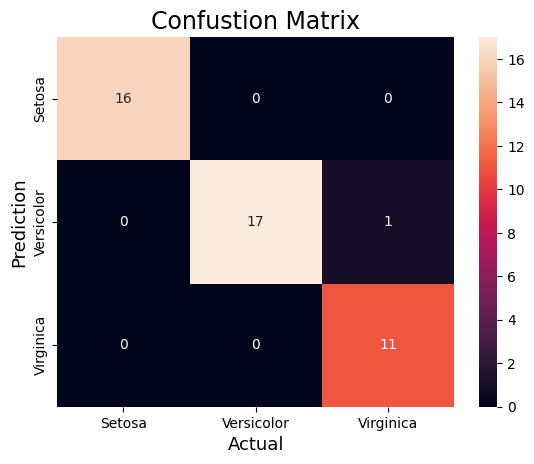

In [56]:
sns.heatmap(result,
            annot = True,
            fmt = 'g',
            xticklabels = ['Setosa', 'Versicolor', 'Virginica'],
            yticklabels = ['Setosa', 'Versicolor', 'Virginica'])

plt.ylabel('Prediction', fontsize = 13)
plt.xlabel('Actual', fontsize = 13)
plt.title("Confustion Matrix", fontsize = 17)
plt.show()

In [55]:
classication_result  = classification_report(y_test, y_pred_test)
print("Classification Report:", classication_result)
print('Accuracy: ', test_accuracy)

Classification Report:                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45

Accuracy:  0.9777777777777777


In [57]:
from sklearn.ensemble import RandomForestClassifier

RFC_clf = RandomForestClassifier(n_estimators=10)
RFC_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [58]:
y_pred_rfc_train = RFC_clf.predict(X_train)

In [61]:
rfc_train_accuracy = accuracy_score(y_train, y_pred_rfc_train)
print("RFC Train Accuracy: ", rfc_train_accuracy)

RFC Train Accuracy:  1.0


In [62]:
y_pred_rfc_test = RFC_clf.predict(X_test)

In [63]:
rfc_test_accuracy = accuracy_score(y_test, y_pred_rfc_test)
print("RFC Test Accuracy: ", rfc_test_accuracy)

RFC Test Accuracy:  0.9777777777777777


In [69]:
classification_report_test = classification_report(y_test, y_pred_rfc_test)
print("classification_report_test: " , classification_report_test)
print("RFC Test Accuracy: ", rfc_test_accuracy)

classification_report_test:                   precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45

RFC Test Accuracy:  0.9777777777777777


In [64]:
RFC_confusion_matrix = confusion_matrix(y_test, y_pred_rfc_test)

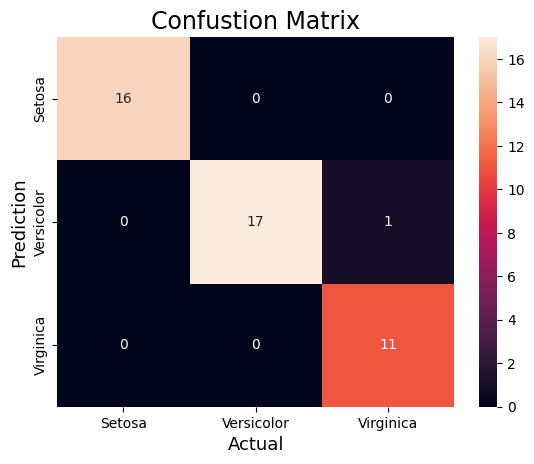

In [68]:
sns.heatmap(RFC_confusion_matrix,
            annot = True,
            fmt = 'g',
            xticklabels = ['Setosa', 'Versicolor', 'Virginica'],
            yticklabels = ['Setosa', 'Versicolor', 'Virginica'])

plt.ylabel('Prediction', fontsize = 13)
plt.xlabel('Actual', fontsize = 13)
plt.title("Confustion Matrix", fontsize = 17)
plt.show()